In this section, we will use various PCA on various Technical Indicator (TA) to create our feature matrix.

# Setting up our Notebook

In [3]:
# Things to import

# Standard data, plotting, and mathematical tools
import numpy as np
import pandas as pd
import math as math
import matplotlib as mpl
import matplotlib.pyplot as plt

# Libraries for financial data manipulation
import talib
import mplfinance as mpf

# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Feature Selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE

The three data sets are daily Open, High, Low, Close, Adjusted Close, and Volume for BTC-USD, ETH-USD, and ADA-USD from August 25th, 2021 and going back five years. These coins where chosen for thier longetivity in the crypto space and their leading market cap.

The data is taken from Yahoo! Finance (https://finance.yahoo.com/) on August 25th, 2021.

# Importing and Visualizing the Data

In [4]:
# Importing the data

coins=['BTC', 'ETH', 'ADA']

# Getting the files
data_files=['Data/BTC-USD-H.csv', 'Data/ETH-USD-H.csv', 'Data/ADA-USD-H.csv']

# Creating data frames for them
df_BTC=pd.read_csv(data_files[0])
df_BTC=df_BTC.dropna()
df_ETH=pd.read_csv(data_files[1])
df_ETH=df_ETH.dropna()
df_ADA=pd.read_csv(data_files[2])
df_ADA=df_ADA.dropna()

dfs=[df_BTC, df_ETH, df_ADA]

In [5]:
# # Initial Visualization function

# for i in [0]:
#     # Columns must be in a specific order for the candlestick chart (OHLC)
#     df = dfs[i][['Open', 'High', 'Low', 'Close','Volume']]
    
#     # Index must be set as the date
#     df.index = pd.DatetimeIndex(df['Date'])

#     # Graphing
#     mpf.plot(df,type='candle',figsize=(20,12),volume=True, title=coins[i])

8/25: Because some of these coins (DOGE in particular) don't actually gain any real value until recently, do I want to cut off the past when they begin to do something? Or, I can only choose the highest market cap ones.

8/27: I chose to run only the top 3 market cap.

# Our Indicators

Taken from http://mrjbq7.github.io/ta-lib/doc_index.html

## Overlap Studies Functions

In [6]:
# #BBANDS - Bollinger Bands
# upperband, middleband, lowerband = BBANDS(close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)

# #DEMA - Double Exponential Moving Average
# real = DEMA(close, timeperiod=30)

# #EMA - Exponential Moving Average
# real = EMA(close, timeperiod=30)

# #HT_TRENDLINE - Hilbert Transform - Instantaneous Trendline
# real = HT_TRENDLINE(close)

# #KAMA - Kaufman Adaptive Moving Average
# real = KAMA(close, timeperiod=30)

# #MA - Moving average
# real = MA(close, timeperiod=30, matype=0)

# #TEMA - Triple Exponential Moving Average
# real = TEMA(close, timeperiod=30)

# #TRIMA - Triangular Moving Average
# real = TRIMA(close, timeperiod=30)

# #WMA - Weighted Moving Average
# real = WMA(close, timeperiod=30)

## Momentum Indicators

In [7]:
# # AROON - Aroon
# aroondown, aroonup = AROON(high, low, timeperiod=14)

# #AROONOSC - Aroon Oscillator
# real = AROONOSC(high, low, timeperiod=14)

# #MACD - Moving Average Convergence/Divergence
# macd, macdsignal, macdhist = MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)

# # MOM - Momentum
# real = MOM(close, timeperiod=10)

# #ROC - Rate of change : ((price/prevPrice)-1)*100
# real = ROC(close, timeperiod=10)

# #ROCP - Rate of change Percentage: (price-prevPrice)/prevPrice
# real = ROCP(close, timeperiod=10)

# #ROCR - Rate of change ratio: (price/prevPrice)
# real = ROCR(close, timeperiod=10)

# #RSI - Relative Strength Index
# real = RSI(close, timeperiod=14)

# #STOCH - Stochastic
# slowk, slowd = STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

# #STOCHF - Stochastic Fast
# fastk, fastd = STOCHF(high, low, close, fastk_period=5, fastd_period=3, fastd_matype=0)

# #SOCHRSI - Stochastic Relative Strength Index
# fastk, fastd = STOCHRSI(close, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)

# #ULTOSC - Ultimate Oscillator
# real = ULTOSC(high, low, close, timeperiod1=7, timeperiod2=14, timeperiod3=28)

# # WILLR - Williams' %R
# real = WILLR(high, low, close, timeperiod=14)

## Volume Indicator Functions

In [8]:
# #AD - Chaikin A/D Line
# real = AD(high, low, close, volume)

# #ADOSC - Chaikin A/D Oscillator
# real = ADOSC(high, low, close, volume, fastperiod=3, slowperiod=10)

# #OBV - On Balance Volume
# real = OBV(close, volume)

## Volatility Indicator Functions

In [9]:
# #ATR - Average True Range
# real = ATR(high, low, close, timeperiod=14)

# #NATR - Normalized Average True Range
# real = NATR(high, low, close, timeperiod=14)

# #TRANGE - True Range
# real = TRANGE(high, low, close)

## Price Transform Functions

In [10]:
# # AVGPRICE - Average Price
# real = AVGPRICE(open, high, low, close)

# #MEDPRICE - Median Price
# real = MEDPRICE(high, low)

# #TYPPRICE - Typical Price
# real = TYPPRICE(high, low, close)

# #WCLPRICE - Weighted Close Price
# real = WCLPRICE(high, low, close)

## Cycle Indicator Functions

In [11]:
# #HT_DCPERIOD - Hilbert Transform - Dominant Cycle Period
# real = HT_DCPERIOD(close)

# #HT_DCPHASE - Hilbert Transform - Dominant Cycle Phase
# real = HT_DCPHASE(close)

# #HT_PHASOR - Hilbert Transform - Phasor Components
# inphase, quadrature = HT_PHASOR(close)

# #HT_SINE - Hilbert Transform - SineWave
# sine, leadsine = HT_SINE(close)

# #HT_TRENDMODE - Hilbert Transform - Trend vs Cycle Mode
# integer = HT_TRENDMODE(close)

## Technical Indicators Used:

### Overlap Studies Functions:

Bollinger Bands. timeperiod=10,12,14,16,18,20

Exponential Moving Average. timeperiod=20,25,30,35,40

Weighted Moving Average. timeperiod=20,25,30,35,40

### Momentum Indicators:

Aroon. timeperiod=10,12,14,16,18,20

Aroon Oscillator. timeperiod=10,12,14,16,18,20

MACD - Moving Average Convergence/Divergence

RSI. timeperiod=10,12,14,16,18,20

Stochastic Oscillator. timeperiod=1,3,5,7,9 and 3,5,7,9,11

Stochastic Fast: timeperiod=1,3,5,7,9 and 3,5,7,9,11

### Volume Indicator Functions:

Chaikin A/D Line. No time frame

Volatility Indicator Functions:

Normalized Average True Range. timeperiod=10,12,14,16,18,20

### Price Transform Functions:

Median Price. timeperiod=10,12,14,16,18,20

### Cycle Indicator Functions:

Hilbert Transform - Dominant Cycle Period. No time frame

Hilbert Transform - Dominant Cycle Phase. No time frame

# Function for Technical Indicator Features

In [12]:
# Importing our indicators

from talib import BBANDS
from talib import AROON
from talib import AROONOSC
from talib import RSI
from talib import NATR
from talib import EMA
from talib import WMA
from talib import STOCH
from talib import STOCHF
from talib import MACD 
from talib import MEDPRICE
from talib import AD
from talib import HT_DCPERIOD
from talib import HT_DCPHASE

## Data and Features Unscaled

In [13]:
def TA(df):
    
    # Empty lists to fill with features and data
    features=[]
    data=[]
    
    # Getting our High, Low, Close, and Volume data
    high=df['High']
    low=df['Low']
    close=df['Close']
    volume=df['Volume']
    
    for t in [10, 12, 14, 16, 18, 20]: # These indicators all use roughly the same time frame given as 14 by default
        
        #BBANDS - Bollinger Bands
        upperband, middleband, lowerband = BBANDS(close, timeperiod=t, nbdevup=2, nbdevdn=2, matype=0)
        
        features.append('BB_upper '+str(t))
        features.append('BB_middle '+str(t))
        features.append('BB_lower '+str(t))
        data.append(upperband)
        data.append(middleband)
        data.append(lowerband)
        
        # AROON - Aroon
        aroondown, aroonup = AROON(high, low, timeperiod=t)
        
        features.append('Aroon_down '+str(t))
        features.append('Aroon_up '+str(t))
        data.append(aroondown)
        data.append(aroondown)

        #AROONOSC - Aroon Oscillator
        aroonosc= AROONOSC(high, low, timeperiod=t)
        
        features.append('Aroonosc '+str(t))
        data.append(aroonosc)      
        
        # RSI- Rising Strength Indicator
        rsi = RSI(close, timeperiod=t)
        
        features.append('RSI '+str(t))
        data.append(rsi)
        
        #NATR - Normalized Average True Range
        natr = NATR(high, low, close, timeperiod=t)
        
        features.append('NATR '+str(t))
        data.append(natr)
              
    for t in [20,25,30,35,40]: # These indicators use roughly the same time frame starting at 30 as the default
        
        #EMA - Exponential Moving Average
        ema = EMA(close, timeperiod=t)
        
        features.append('EMA '+str(t))
        data.append(ema)
        
        #WMA - Weighted Moving Average
        wma = WMA(close, timeperiod=t)
        
        features.append('WMA '+str(t))
        data.append(wma)
        
    for m in [1,3,5,7,9]: # These indicators have two components, the lower starting at 3 and the upper 5 by default
        
        #STOCH - Stochastic
        slowk, slowd = STOCH(high, low, close, fastk_period=m+2, slowk_period=m, slowk_matype=0, 
                             slowd_period=m, slowd_matype=0)
        
        features.append('fastk '+str(m+2))
        features.append('slowk/slowd '+str(m))
        data.append(slowk)
        data.append(slowd)
        
        #STOCHF - Stochastic Fast
        fastk, fastd = STOCHF(high, low, close, fastk_period=m+2, fastd_period=m, fastd_matype=0)
        
        features.append('fastk '+str(m+2))
        features.append('fastd '+str(m))
        data.append(fastk)
        data.append(fastd)
    
    for m in [6, 9, 12, 15, 18]:
        
        #MACD - Moving Average Convergence/Divergence
        macd, macdsignal, macdhist = MACD(close, fastperiod=m, slowperiod=2*m, 
                                          signalperiod=math.floor(1.5*m))
        
        features.append('MACD '+str(m))
        features.append('MACD Signal '+str(m))
        features.append('MACD Hist'+str(m))
        data.append(macd)
        data.append(macdsignal)
        data.append(macdhist)
    
    # Indicators without time frames
    
    #MEDPRICE - Median Price
    medprice = MEDPRICE(high, low)
    
    features.append('Med Price')
    data.append(medprice)
    
    #AD - Chaikin A/D Line
    ad = AD(high, low, close, volume)
    
    features.append('Chaikin A/D Line')
    data.append(ad)
    
    #HT_DCPERIOD - Hilbert Transform - Dominant Cycle Period
    ht_dcperiod = HT_DCPERIOD(close)
    
    features.append('HT Dom Phase')
    data.append(ht_dcperiod)

    #HT_DCPHASE - Hilbert Transform - Dominant Cycle Phase
    ht_dcphase = HT_DCPHASE(close)
    
    features.append('HT Dom Period')
    data.append(ht_dcphase)

    features.append('High')
    features.append('Low')
    features.append('Close')
    features.append('Volume')
    data.append(high)
    data.append(low)
    data.append(close)
    data.append(volume)

    return features, data

# Creating our Feature Matrix

## Non-Scaled Matrix

In [14]:
# Labeling Function

def labeling(df):
    pct_changes=df['Close'].pct_change(periods=24)
    pct_changes=100*pct_changes    
    labels=[]
    for value in pct_changes:
        if value>1:
            labels.append(2) # Buy
        if -1<value<1:
            labels.append(1) # Hold
        if value<-1:
            labels.append(0) # Sell
    return labels

In [15]:
# Defining a function that will create a TA feature csv

def TA_df(features, data):
    list_of_columns=data
    full_df=pd.DataFrame(list_of_columns, features)
    full_df=np.transpose(full_df)
    labels=labeling(full_df)
    full_df=full_df[24:] # The first row doesn't have a label, so we drop it
    full_df['Label']=labels 
    full_df['Label']=full_df['Label'].shift(-1)
    full_df=full_df.dropna()
    full_df.to_csv('Non-Scaled TA Features Hourly Matrix Plus Labels 24 for '+coins[i]+'.csv')
    
    print('Done!')

In [16]:
# Running the function to create a TA feature csv for each coin

for i in range(len(dfs)):
    features, data=TA(dfs[i])
    TA_df(features, data)

Done!
Done!
Done!


# Principle Component Analysis

8/30: We are only considering BTC for now to get it all working.

8/31: It is working so we will create a function to do all three coins

In [17]:
# Defining a function to discover the best PCA matrix for each coin

def PCA_creation(file, coin):
    
    # Importing the data
    df=pd.read_csv(file)
    df=df.drop('Label', axis=1)
    df=df.drop('Unnamed: 0', axis=1)
    
    # Scaling the data and getting our X matrix
    scaler=StandardScaler()
    df_scaled=scaler.fit_transform(df)
    X=pd.DataFrame(df_scaled)
    
    # Fitting PCA to our X TA matric
    pca = PCA()
    pca.fit(X)
    
    # Plot the cumulative sum of the explained variance ratio
    cumsum = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(cumsum, 'rx-')
    plt.xlabel('Principal component number')
    plt.ylabel('Cum sum')
    plt.title('The cumulative sum of exp var ratio for '+str(coin));

    # Plot the spectrum of the covariance matrix
    plt.figure(figsize=(25,15))
    plt.plot(pca.explained_variance_, 'bo-')
    plt.xlabel('Principal component number')
    plt.ylabel('Eigenvalues')
    plt.title('The spectrum of the covariance matrix for '+str(coin));
    
    return X

In [18]:
# Creating a list of file names of the feature matrices

non_scaled_plus_label_files=['Non-Scaled TA Features Hourly Matrix Plus Labels 24 for BTC.csv',
                            'Non-Scaled TA Features Hourly Matrix Plus Labels 24 for ETH.csv',
                            'Non-Scaled TA Features Hourly Matrix Plus Labels 24 for ADA.csv']

## BTC

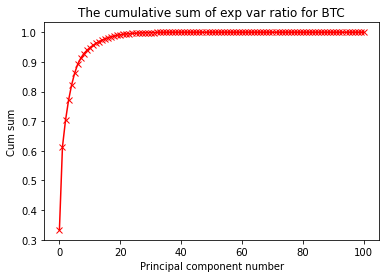

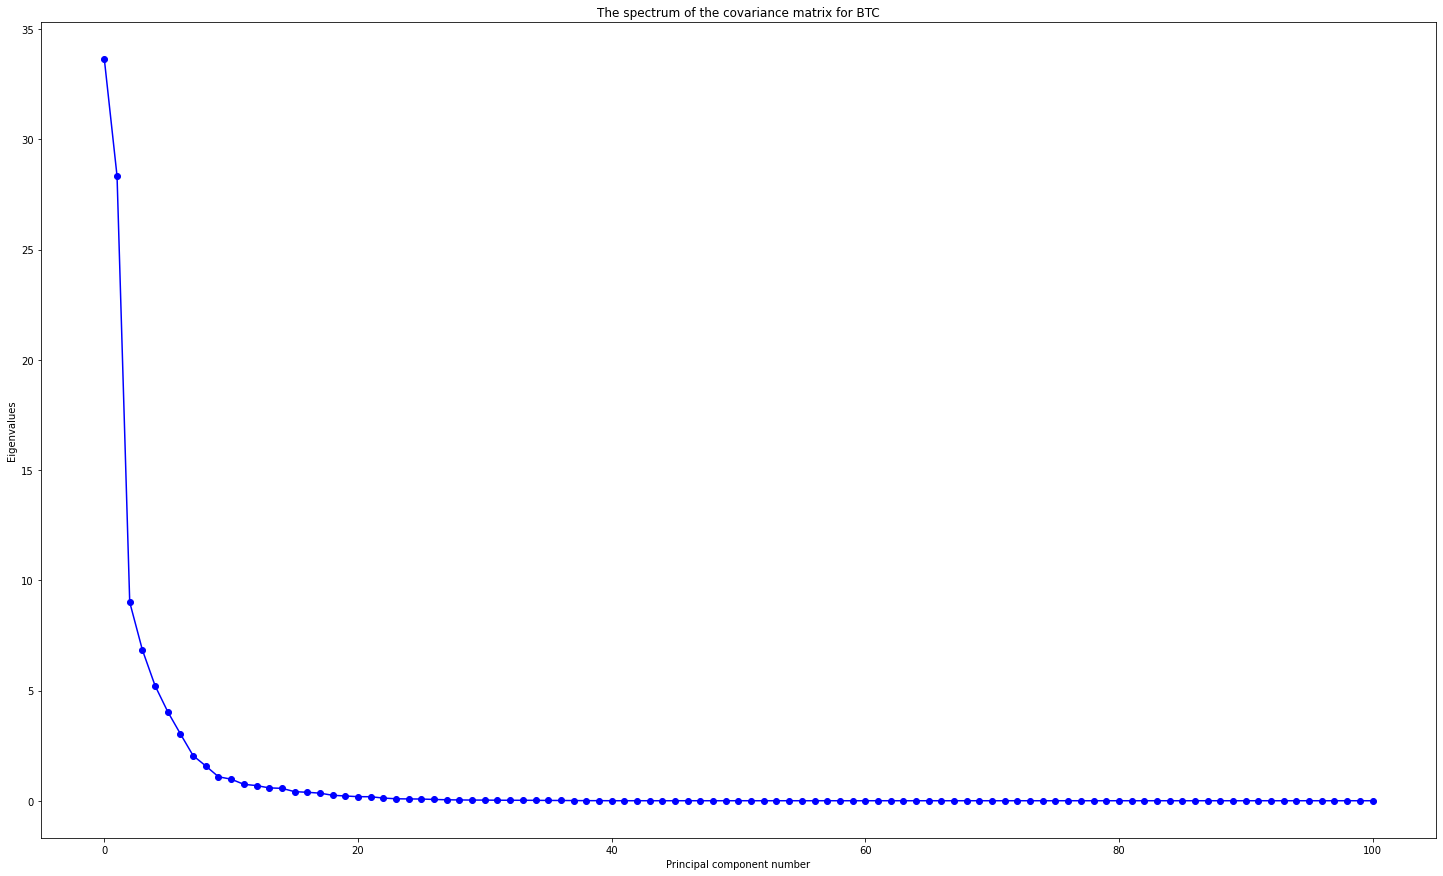

In [19]:
# Running our PCA_creation for BTC

X=PCA_creation(non_scaled_plus_label_files[0],coins[0])

In [20]:
# From our graphs, we decide on the first 20 PCA components

pca=PCA(n_components=20)
pca_BTC=pca.fit_transform(X)
pca_BTC_df=pd.DataFrame(pca_BTC)

# Adding our labels for ease of access
labels=pd.read_csv(non_scaled_plus_label_files[0])
labels=labels['Label']
pca_BTC_df['Label']=labels

pca_BTC_df.to_csv('PCA 24 Hourly BTC.csv')

## ETH

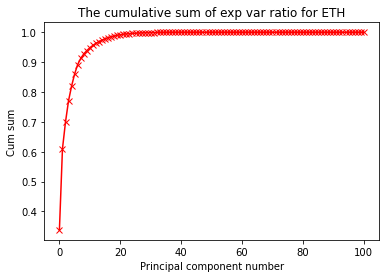

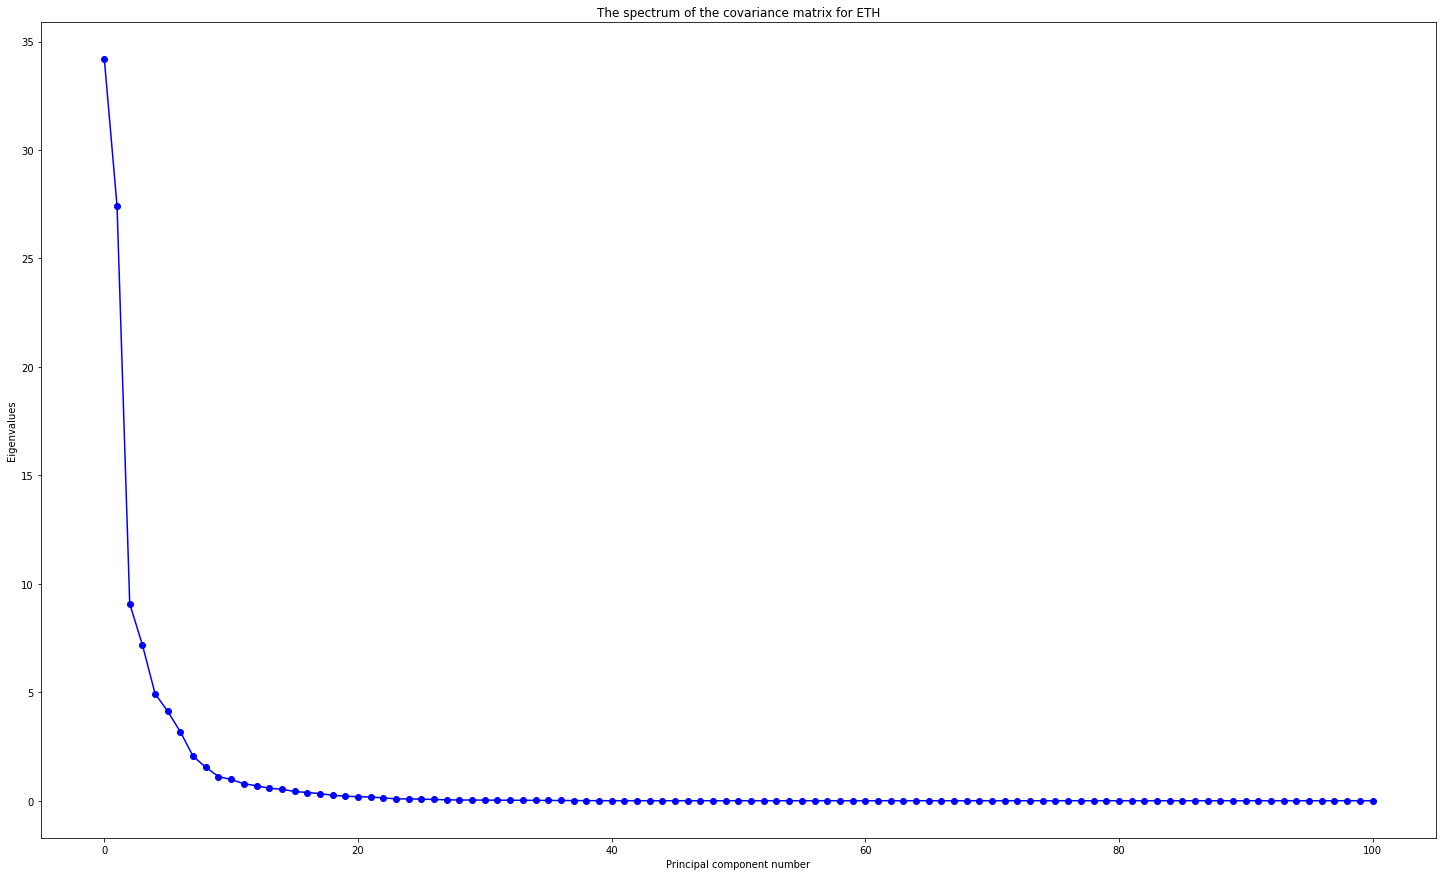

In [21]:
# Running our PCA_creation for ETH

X=PCA_creation(non_scaled_plus_label_files[1],coins[1])

In [22]:
# From our graphs, we decide on the first 20 PCA components

pca=PCA(n_components=20)
pca_ETH=pca.fit_transform(X)
pca_ETH_df=pd.DataFrame(pca_ETH)

# Adding our labels for ease of access
labels=pd.read_csv(non_scaled_plus_label_files[1])
labels=labels['Label']
pca_ETH_df['Label']=labels

pca_ETH_df.to_csv('PCA 24 Hourly ETH.csv')

## ADA

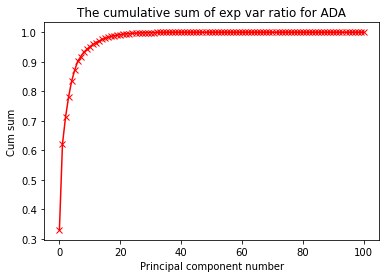

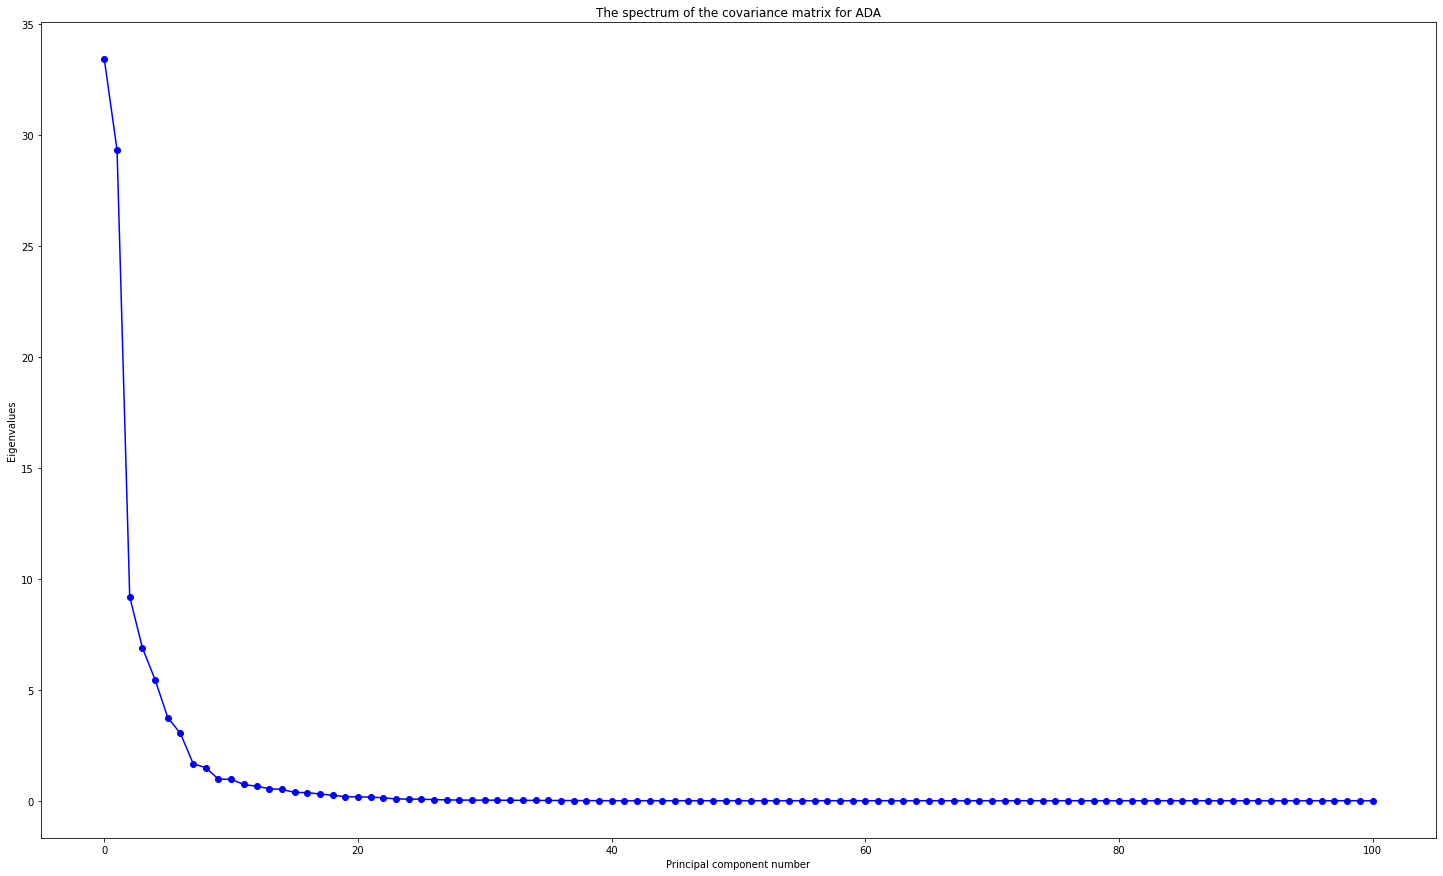

In [23]:
# Running our PCA_creation for ADA

X=PCA_creation(non_scaled_plus_label_files[2],coins[2])

In [24]:
# From our graphs, we decide on the first 20 PCA components

pca=PCA(n_components=20)
pca_ADA=pca.fit_transform(X)
pca_ADA_df=pd.DataFrame(pca_ADA)

# Adding our labels for ease of access
labels=pd.read_csv(non_scaled_plus_label_files[2])
labels=labels['Label']
pca_ADA_df['Label']=labels

pca_ADA_df.to_csv('PCA 24 Hourly ADA.csv')

8/28: Is the actual variance explained mostly by 1 component?

8/30: Look at how to orthogonal rotation (varimax) and then run PCA again. 
Check to see if it centered around the mean (make sure it is zero).
Check the assumption of PCA.

8/31: PCA giving me MUCH better results. I am now thinking 20 features. Is it the first 20? How do I know?